In [1]:
# Curve fitting. 보간법.
# Linear regression. 선형회기.
# 오늘은 cubi spline

In [2]:
# UnivariateSpline
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
plt.rcParams["figure.figsize"] = (20,12)
plt.rcParams.update({'font.size': 20})

# Red dots
x = np.linspace(-3, 3, 50)
y = np.exp(-x**2) + 0.1*np.random.randn(50)

# Cubic spline fitting
plt.plot(x,y,'ro',ms=5)
spl = UnivariateSpline(x,y)

#Plotting
xs = np.linspace(-3,3,1000)
plt.plot(xs, spl(xs), 'g', lw=3)
spl.set_smoothing_factor(0.5)
plt.plot(xs, spl(xs), 'b', lw=3)
plt.show()

<Figure size 2000x1200 with 1 Axes>

In [3]:
import numpy as np
data = np.genfromtxt('data/3.1_1.dat',delimiter=',')

In [4]:
data

array([[-1.2 ,  0.3 ,  1.1 ],
       [-5.76, -5.61, -3.69]])

In [5]:
import ch3

In [6]:
!cat ch3.py


## module gaussPivot
'''
    x = gaussPivot(a,b,tol=1.0e-12).
    Solves [a]{x} = {b} by Gauss elimination with
    scaled row pivoting
'''
import numpy as np
#import swap
#import error
def gaussPivot(a,b,tol=1.0e-12):
    n = len(b)
  # Set up scale factors
    s = np.zeros(n)
    for i in range(n):
        s[i] = max(np.abs(a[i,:]))
    for k in range(0,n-1):
  # Row interchange, if needed
        p = np.argmax(np.abs(a[k:n,k])/s[k:n]) + k
        if abs(a[p,k]) < tol: error.err('Matrix is singular')
        if p != k:
            swapRows(b,k,p)
            swapRows(s,k,p)
            swapRows(a,k,p)
      # Elimination
        for i in range(k+1,n):
            if a[i,k] != 0.0:
                lam = a[i,k]/a[k,k]
                a[i,k+1:n] = a[i,k+1:n] - lam*a[k,k+1:n]
                b[i] = b[i] - lam*b[k]
    
    if abs(a[n-1,n-1]) < tol: error.err('Matrix is singular')
  # Back substitution
    b[n-1] = b[n-1]/a[n-1,n-1]
    for k in range(n-2,-1,-1):
        b[k] = (b[k] - n

In [7]:
ch3.neville(data[0],data[1],0.3)

-5.610000000000001

In [8]:
from ch3 import *

In [9]:
neville(data[0],data[1],0.5)

-5.250000000000002

In [10]:
import sys

In [11]:
sys.path

['/usr/lib64/python36.zip',
 '/usr/lib64/python3.6',
 '/usr/lib64/python3.6/lib-dynload',
 '',
 '/home/jwheo/.local/lib/python3.6/site-packages',
 '/usr/local/lib64/python3.6/site-packages',
 '/usr/local/lib/python3.6/site-packages',
 '/usr/local/lib/python3.6/site-packages/nose-1.3.7-py3.6.egg',
 '/usr/local/lib/python3.6/site-packages/PyRDF-0.2.1-py3.6.egg',
 '/usr/lib64/python3.6/site-packages',
 '/usr/lib/python3.6/site-packages',
 '/usr/local/lib/python3.6/site-packages/IPython/extensions',
 '/home/jwheo/.ipython']

In [12]:
cf = np.polyfit(data[0],data[1],1)    # xData, yData, degree
ffun = np.poly1d(cf)

In [13]:
ffun

poly1d([ 0.79731051, -5.07315403])

In [14]:
# Code the linear regression formula

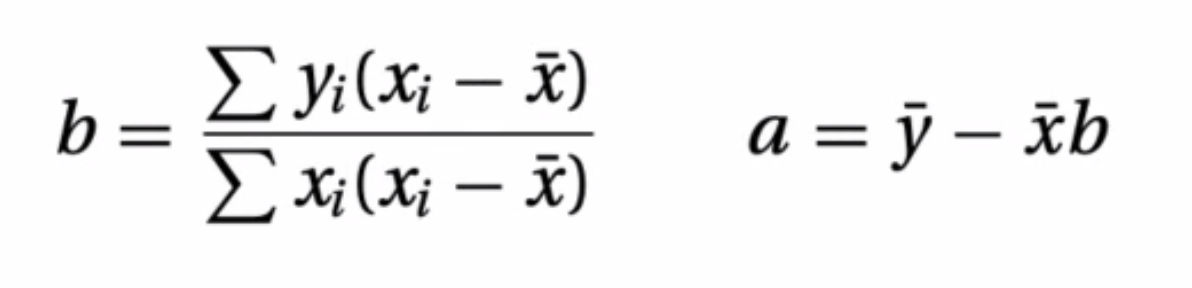

In [15]:
x = data[0]
y = data[1]
x_ = x.mean()    # = x_ = np.sum(x)/len(x)
y_ = y.mean()

u = 0
d = 0
for i in range(len(x)):
    u += y[i]*(x[i]-x_)
    d += x[i]*(x[i]-x_)

b = u/d
a = y_ - x_*b
b,a

(0.7973105134474328, -5.073154034229829)

In [16]:
len(data[0])

3

In [17]:
import numpy as np
import math

xData = np.array([0.15,2.3,3.15,4.85,6.25,7.95])
yData = np.array([4.79867,4.49013,4.2243,3.47313,2.66674,1.51909])
a = coeffts(xData,yData)

print(" x    yInterp   yExact")
print("-----------------------")
for x in np.arange(0.0,8.1,0.5):
    y = evalPoly(a,xData,x)
    yExact = 4.8*math.cos(math.pi*x/20.0)
    print('{:3.1f} {:9.5f} {:9.5f}'.format(x,y,yExact))

 x    yInterp   yExact
-----------------------
0.0   4.80003   4.80000
0.5   4.78518   4.78520
1.0   4.74088   4.74090
1.5   4.66736   4.66738
2.0   4.56507   4.56507
2.5   4.43462   4.43462
3.0   4.27683   4.27683
3.5   4.09267   4.09267
4.0   3.88327   3.88328
4.5   3.64994   3.64995
5.0   3.39411   3.39411
5.5   3.11735   3.11735
6.0   2.82137   2.82137
6.5   2.50799   2.50799
7.0   2.17915   2.17915
7.5   1.83687   1.83688
8.0   1.48329   1.48328


In [18]:
# Newton
acoeffts = coeffts(data[0],data[1])
evalPoly(acoeffts,data[0],1)

# Neville
neville(data[0],data[1],0.3)


-5.610000000000001

In [19]:
acoeffts

array([-5.76,  0.1 ,  1.  ])

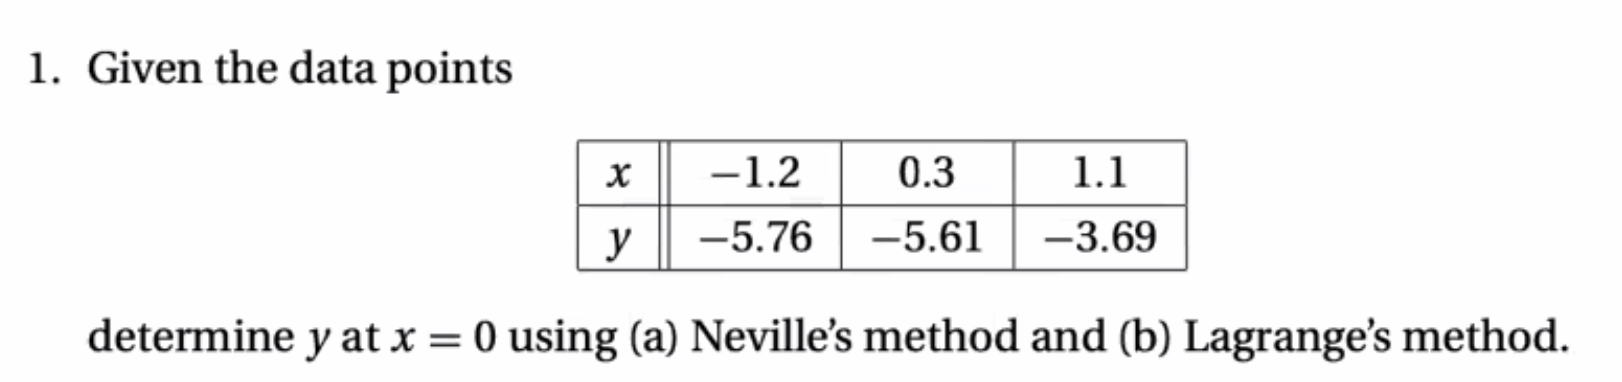

In [20]:
print(data)
# a
print('y at x = 0 ->',neville(data[0],data[1],0.))

# Newton
acoeffts = coeffts(data[0],data[1])
print(acoeffts)
print('y at x = 0 ->',evalPoly(acoeffts,data[0],0.))

# b Lagrange's method

[[-1.2   0.3   1.1 ]
 [-5.76 -5.61 -3.69]]
y at x = 0 -> -6.000000000000002
[-5.76  0.1   1.  ]
y at x = 0 -> -6.0


In [21]:
# Polynomial.
# Rational fitting.
neville(xData,yData,x)
rational(xData,yData,x)

1.4832677300529546

In [22]:
# Plot 3.1_14.dat    using Nevill and Rational interpolation in a grid of 40 points
# Plot 3.1_16.dat    using Nevill and Rational interpolation in a grid of 40 points

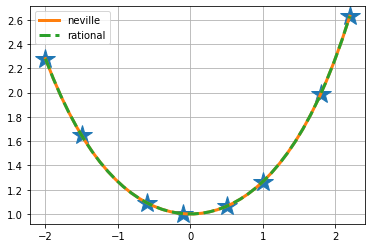

In [23]:
data = np.genfromtxt('data/3.1_14.dat',delimiter=',')
xdata = data[0]
ydata = data[1]

nev = []
rat = []
x = np.linspace(xdata.min(),xdata.max(),40)
for i in x:
    nev.append(neville(xdata,ydata,i))
    rat.append(rational(xdata,ydata,i))

plt.plot(xdata,ydata,'*',markersize=20)
plt.plot(x,nev,'-',linewidth=3,label='neville')
plt.plot(x,rat,'--',linewidth=3,label='rational')
plt.legend()
plt.grid()
plt.show()

[[0.     0.0204 0.1055 0.241  0.582  0.712  0.981 ]
 [0.385  1.04   1.79   2.63   4.39   4.99   5.27  ]]


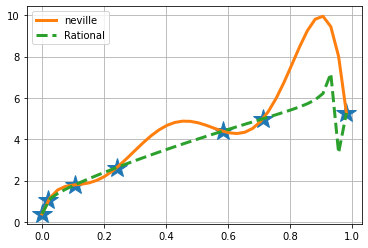

In [24]:
data = np.genfromtxt('data/3.1_16.dat',delimiter=',')
xdata = data[0]
ydata = data[1]

print(data)
nev = []
rat = []
x = np.linspace(xdata.min(),xdata.max(),40)
for i in x:
    nev.append(neville(xdata,ydata,i))
    rat.append(rational(xdata,ydata,i))
    
plt.plot(xdata,ydata,'*',markersize=20)
plt.plot(x,nev,'-',linewidth=3,label='neville')
plt.plot(x,rat,'--',linewidth=3,label='Rational')
plt.legend()
plt.grid()
plt.show()

In [47]:
#!/usr/bin/python
## example3_9

import numpy as np
#from cubicSpline import *
xData = np.array([1,2,3,4,5],float)
yData = np.array([0,1,0,1,0],float)
k = curvatures(xData,yData)

def evalSpline(xData,yData,k,x):
    def findSegment(xData,x):
        iLeft = 0
        iRight = len(xData)- 1
        while 1:
            if (iRight-iLeft) <= 1: return iLeft
            i =(iLeft + iRight)//2
            if x < xData[i]: iRight = i
            else: iLeft = i
    i = findSegment(xData,x)
    h = xData[i] - xData[i+1]
    y = ((x - xData[i+1])**3/h - (x - xData[i+1])*h)*k[i]/6.0 \
            - ((x - xData[i])**3/h - (x - xData[i])*h)*k[i+1]/6.0   \
            + (yData[i]*(x - xData[i+1])                            \
            - yData[i+1]*(x - xData[i]))/h
            
    return y


while True:
    try: x = eval(input("\nx ==> "))
    except SyntaxError: break
    print("y =",evalSpline(xData,yData,k,x))
#input("Done. Press return to exit")


x ==>  3


y = 0.0



x ==>  2


y = 1.0



x ==>  1


y = 0.0



x ==>  3


y = 0.0



x ==>  4


y = 1.0



x ==>  5


y = -0.0



x ==>  6


y = -1.0



x ==>  1


y = 0.0



x ==>  2


y = 1.0



x ==>  3


y = 0.0



x ==>  4


y = 1.0



x ==>  5


y = -0.0


KeyboardInterrupt: Interrupted by user

In [ ]:
k = curvatures(xData,yData)
evalSpline(xData,yData,k,x)

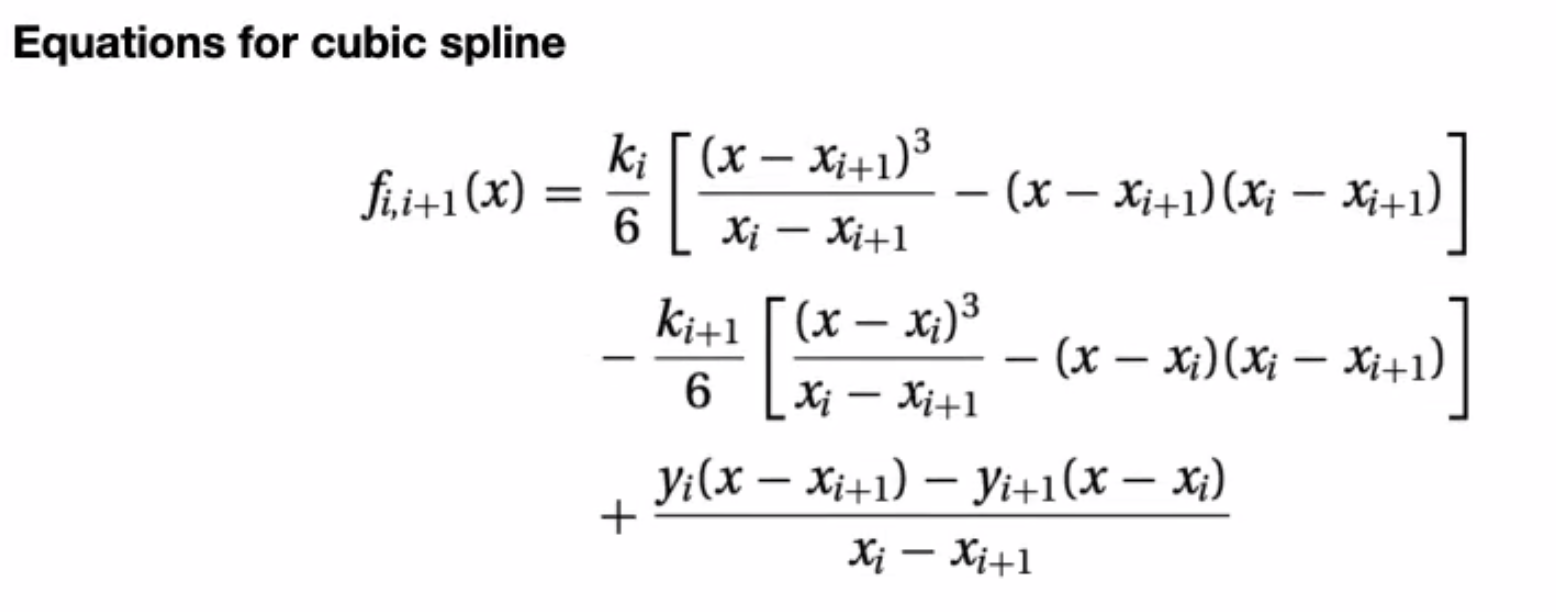

In [ ]:
96/np.pi**4